
# CB 3, Stat 4770/7770, Fall 2024
 
November 2024


Introduction

* In this homework you will download and read in a csv file that contains race times for a local 5K road running race. 
* The file includes finishing times together with the sex and age of the runner.
* You will summarize the file both numerically and graphically.

## Q1. Read in and review the data structure
### 5 pts.

> The data file is called "Run5K.csv".

a. Download the data from the Canvas "Data sets" folder, to your computer and then into a pandas DataFrame. Call the data frame "run_data".

b. Use the shape attribute to find the number of rows and columns in the data frame.

c. Print out the column names.

d. Print out and review the data types for the columns.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Q1 
#1a. (1pt.)
file_path = "Run5K.csv"  # Adjust the path if needed
run_data = pd.read_csv(file_path)

#1b. (1pt.)
print("Shape of the data (rows, columns):", run_data.shape)

#1c. (2pts.) 
print("Column names:", run_data.columns.tolist())

#1d. (1pt.)
print("Column data types:")
print(run_data.dtypes)

Shape of the data (rows, columns): (501, 4)
Column names: ['Time_mins', 'Time_secs', 'SEX', 'AGE']
Column data types:
Time_mins     int64
Time_secs     int64
SEX          object
AGE           int64
dtype: object


## Q2. Create a new column called "Finish_Time"
### 6pts.

You might have noticed that there are two columns containing the race time. One contains the minutes, and the other the seconds.

a. Create a *new* column in the run_data data frame called "Finish_Time" by adding minutes to seconds/60. As pandas is vectorized, you should be able to write a simple arithmetic expression involving the two time columns. There is no need for a for loop here. 

b. Calculate and print the average finish time of all participants. 

c. Print the average finish time for males and for females (use the groupby method). Remember that Python is case sensitive!

d. Save the result from the groupby in 2c into a variable called "mf_avs", and using this variable calculate and print the difference between the average finish times. 

In [14]:
#2a. (1pt.) 
run_data["Finish_Time"] = run_data["Time_mins"] + run_data["Time_secs"] / 60

#2b. (1pt.)
average_finish_time = run_data["Finish_Time"].mean()
print("Average finish time (all participants):", average_finish_time)

#2c. (2pts.)
mf_avs = run_data.groupby("SEX")["Finish_Time"].mean()
print("Average finish time by gender:")
print(mf_avs)


#2d. (2pts.)
gender_difference = abs(mf_avs['M'] - mf_avs['F'])  # Adjust if gender is case-sensitive
print("Difference in average finish times (Male vs. Female):", gender_difference)

Average finish time (all participants): 26.549467731204256
Average finish time by gender:
SEX
F    29.615881
M    24.660161
Name: Finish_Time, dtype: float64
Difference in average finish times (Male vs. Female): 4.955720036029948


## Q3 Bucket the age variable into groups 
### 7pts.

In the class notes we used the 'qcut' function to bucket the "Schedule lag" data. In this question you should use the 'cut' command with age groups defined by these cutpoints: 

[0,16,25,30,35,40,45,50,55,60,65,70]

a. Add the discretized Age variable to the run_data data frame and call the new column "Disc_Age". You will use the pd.cut function to build the new variable with the above "bins" to do this.

b. Using 'groupby' again, find the average finish time by the 'Disc_Age' variable. 

c. Finally print the average finish time by the joint levels of SEX and Disc_Age.

d. Using the results of part c, comment on how finish times vary by age, between men and women. That is, who does aging seem to impact the most?

e. Using your answer to part c, pull out and print just the mean finish times for men and women, aged (40, 45].
Hint: use the '.index.values' attribute to see just exactly what is in the MultiIndex returned with part c.
Then use the .xs() method to extract using the appropriate label of the MultiIndex. This question is meant to involve you doing a bit of your own research to figure out how to do it!

In [15]:
#3a. (1pt.)
bins = [0, 16, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
run_data["Disc_Age"] = pd.cut(run_data["AGE"], bins=bins, right=False)

#3b. (1pt.)
avg_finish_time_by_age = run_data.groupby("Disc_Age")["Finish_Time"].mean()
print("Average finish time by age group:")
print(avg_finish_time_by_age)

#3c. (1pt.)
avg_finish_time_by_sex_age = run_data.groupby(["SEX", "Disc_Age"])["Finish_Time"].mean()
print("Average finish time by gender and age group:")
print(avg_finish_time_by_sex_age)

#3d. (1pt.) Your comment here.
# Aging impacts both men and women, but women consistently show slower finish times across all age groups. 
# Men perform better in younger age groups, with a gradual decline starting in middle age, while women experience 
# a steady increase in finish times as they age. For the [40, 45) age group, men average 25.06 minutes compared 
# to women at 30.32 minutes, highlighting a more pronounced impact of aging on women in this range.

#3e. (3pts.) 
men_women_40_45 = avg_finish_time_by_sex_age.xs(key=40, level="Disc_Age", drop_level=False)
print("Mean finish times for men and women aged (40, 45]:")
print(men_women_40_45)

Average finish time by age group:
Disc_Age
[0, 16)     27.146541
[16, 25)    23.018772
[25, 30)    26.825000
[30, 35)    28.502431
[35, 40)    27.150546
[40, 45)    27.041787
[45, 50)    27.406566
[50, 55)    26.809402
[55, 60)    28.244444
[60, 65)    27.026389
[65, 70)    29.242857
Name: Finish_Time, dtype: float64
Average finish time by gender and age group:
SEX  Disc_Age
F    [0, 16)     29.445370
     [16, 25)    28.523656
     [25, 30)    29.021212
     [30, 35)    30.581410
     [35, 40)    29.644444
     [40, 45)    30.321154
     [45, 50)    29.623810
     [50, 55)    29.885185
     [55, 60)    30.250000
     [60, 65)    30.116667
     [65, 70)          NaN
M    [0, 16)     25.964286
     [16, 25)    20.352344
     [25, 30)    22.798611
     [30, 35)    26.045455
     [35, 40)    24.211310
     [40, 45)    25.058915
     [45, 50)    26.371852
     [50, 55)    25.886667
     [55, 60)    27.515152
     [60, 65)    26.745455
     [65, 70)    29.242857
Name: Finish_Time, dtype: fl

## Q4 Explore the distribution of finish time
### 6pts.

> In the following questions the idea is to now use seaborn to graphically summarize the data.  

a. Use the seaborn 'sns.displot' function to obtain a histogram of the finishing times.

b. Change the color of the plot to green, and add the KDE. If you use the command 'plt.show()' after each histogram, you can get all the plots showing in the cell. If you don't then depending on how Jupyter is set up, you will only see the last one.


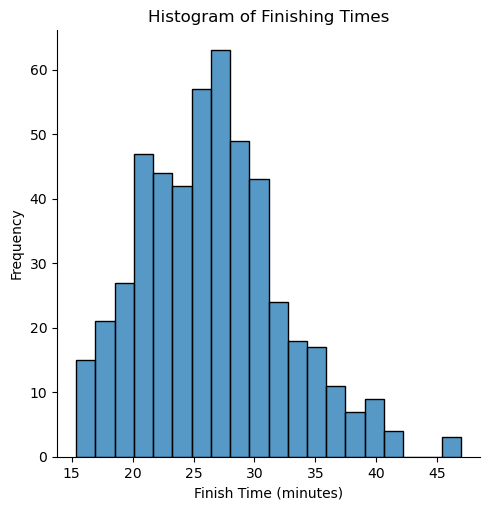

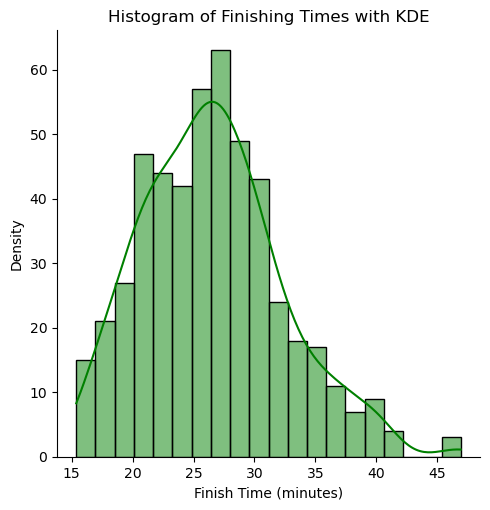

In [16]:
#4a. (3pts.)
sns.displot(run_data["Finish_Time"], bins=20, kde=False)
plt.title("Histogram of Finishing Times")
plt.xlabel("Finish Time (minutes)")
plt.ylabel("Frequency")
plt.show()

#4b. (3pts.)
sns.displot(run_data["Finish_Time"], bins=20, kde=True, color="green")
plt.title("Histogram of Finishing Times with KDE")
plt.xlabel("Finish Time (minutes)")
plt.ylabel("Density")
plt.show()

## Q5 Comparing finishing time distributions for men and women
### 6 pts.

Use the 'sns.catplot' command to produce the required plots for this question.

a. Make a 'box plot' of the finishing time, over the levels of Sex. Orient this plot vertically using the 'orient' argument. 

b. Turn the graph into a violin plot, still vertically orientated and plot it.

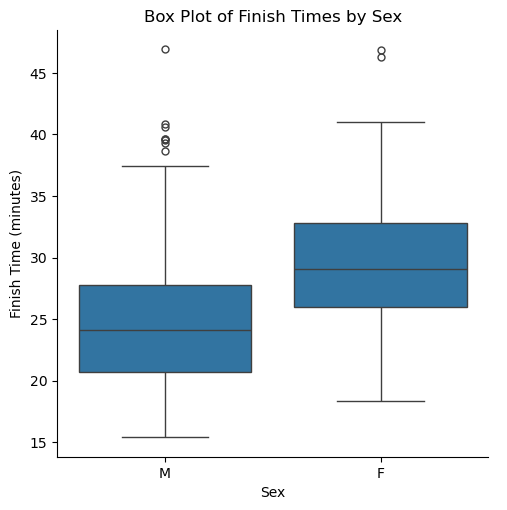

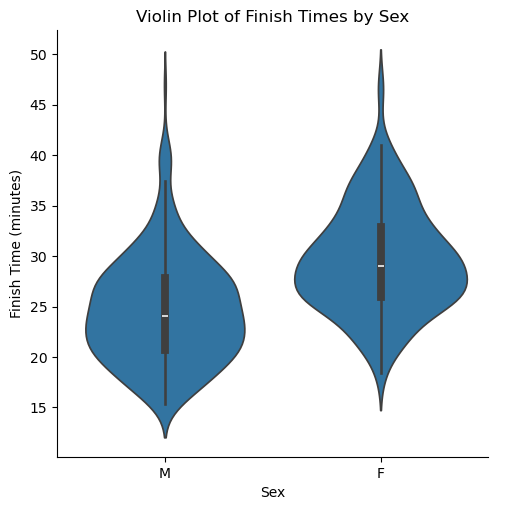

In [17]:
#5a. (3pts.)
sns.catplot(data=run_data, x="SEX", y="Finish_Time", kind="box", orient="v")
plt.title("Box Plot of Finish Times by Sex")
plt.xlabel("Sex")
plt.ylabel("Finish Time (minutes)")
plt.show()

#5b. (3pts.)
sns.catplot(data=run_data, x="SEX", y="Finish_Time", kind="violin", orient="v")
plt.title("Violin Plot of Finish Times by Sex")
plt.xlabel("Sex")
plt.ylabel("Finish Time (minutes)")
plt.show()

## Q6. Bringing age into the mix
### 6 pts.
These questions should use the 'relplot' command in seaborn. Use the continuous version of the AGE variable for now.

a. Plot finish time against AGE. Use the 'height=6, aspect=2' arguments to 'relplot' to make the plot wider.)

b. Add SEX as the hue to the previous plot and display the new plot. 

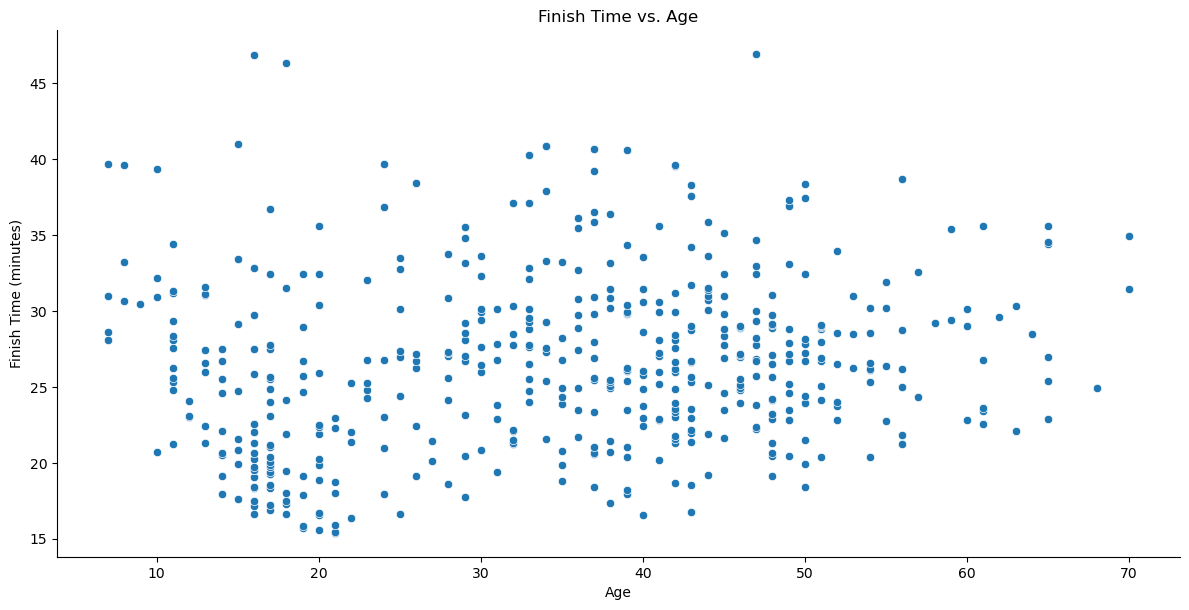

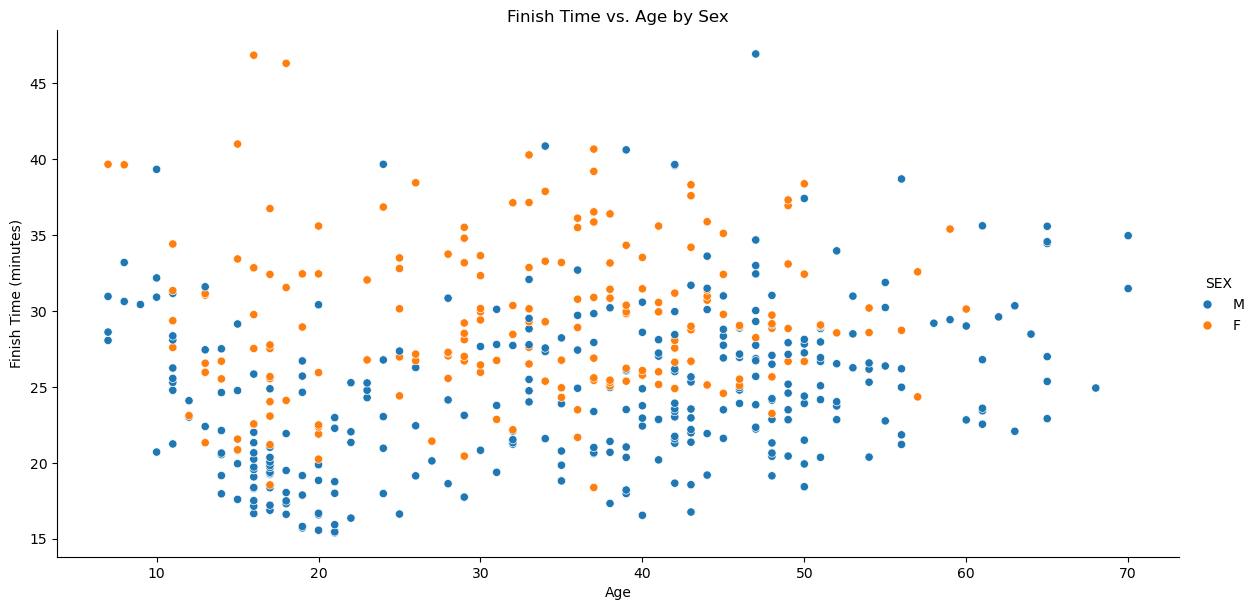

In [18]:
#6a. (3pts.)
sns.relplot(data=run_data, x="AGE", y="Finish_Time", height=6, aspect=2)
plt.title("Finish Time vs. Age")
plt.xlabel("Age")
plt.ylabel("Finish Time (minutes)")
plt.show()
#6b. (3pts.)
sns.relplot(data=run_data, x="AGE", y="Finish_Time", hue="SEX", height=6, aspect=2)
plt.title("Finish Time vs. Age by Sex")
plt.xlabel("Age")
plt.ylabel("Finish Time (minutes)")
plt.show()

## Q7. Counting the number of people in each age bucket, by SEX
### 6 pts.

a. Use the sns.catplot command, with kind='count' to create a graphic that shows the number of runners in each age category, for the two sexes. You don't need a y-variable here, and use the col="SEX" to get two **separate** graphs. 

b. Now create the same graph, but this time rotating the x-axis labels and using a **different** color palette of your choice. Just make sure that the results are clearly visible.

c. Comment on the difference in age distribution between male and female runners.

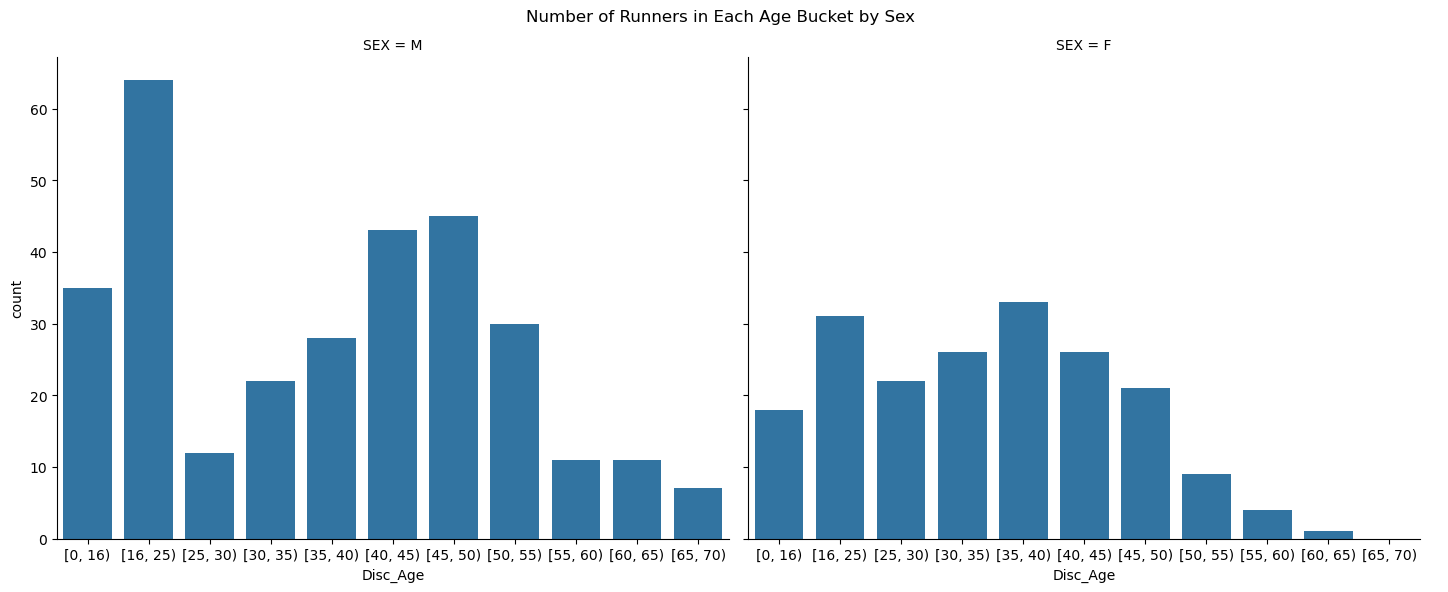

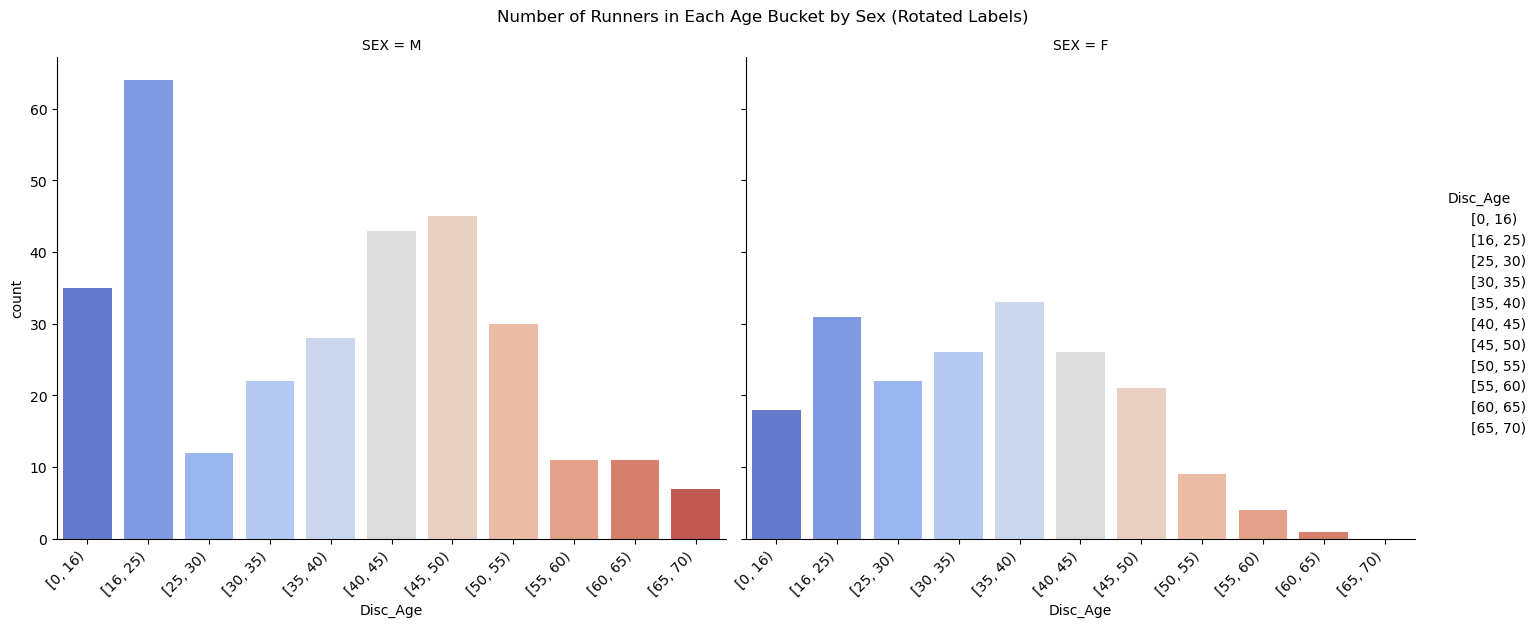

In [19]:
#7a. (2pts.)
sns.catplot(data=run_data, x="Disc_Age", kind="count", col="SEX", height=6, aspect=1.2)
plt.subplots_adjust(top=0.9)
plt.suptitle("Number of Runners in Each Age Bucket by Sex")
plt.show()

#7b. (2pts.)
sns.catplot(data=run_data, x="Disc_Age", kind="count", col="SEX", height=6, aspect=1.2, palette="coolwarm")
plt.subplots_adjust(top=0.9)
plt.suptitle("Number of Runners in Each Age Bucket by Sex (Rotated Labels)")
for ax in plt.gcf().axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
#7c. (2pts.) You answer here. 
# - Male runners are heavily concentrated in the younger age group [16, 25), with a peak in participation,
#   followed by a gradual decline in older age groups.
# - Female runners show a more evenly distributed participation across age groups, though their overall
#   numbers are consistently lower than males in almost all age groups.
# - In older age groups ([60, 65) and [65, 70)), participation declines sharply for both genders, with a more
#   pronounced drop for females.
# - This suggests that younger males dominate running events, while female participation is more consistent
#   across age groups but remains comparatively lower.

## Q8. Plot the mean finish time by age bucket and gender
### 5 pts.

a. Using the sns.catplot command again with 'Finish_Time' as the y-variable, plot the mean finish time (using kind="bar" or kind = "point" will do this), over the **discrete** age groups, with the additional argument 'hue = "SEX"' to obtain a single plot. Use the 'height=6, aspect=2' arguments again to widen the plot. (This will create an appropriate graph for the summaries you calculated in Q3).

b. Comment on the difference in average finish time between men and women as they age.

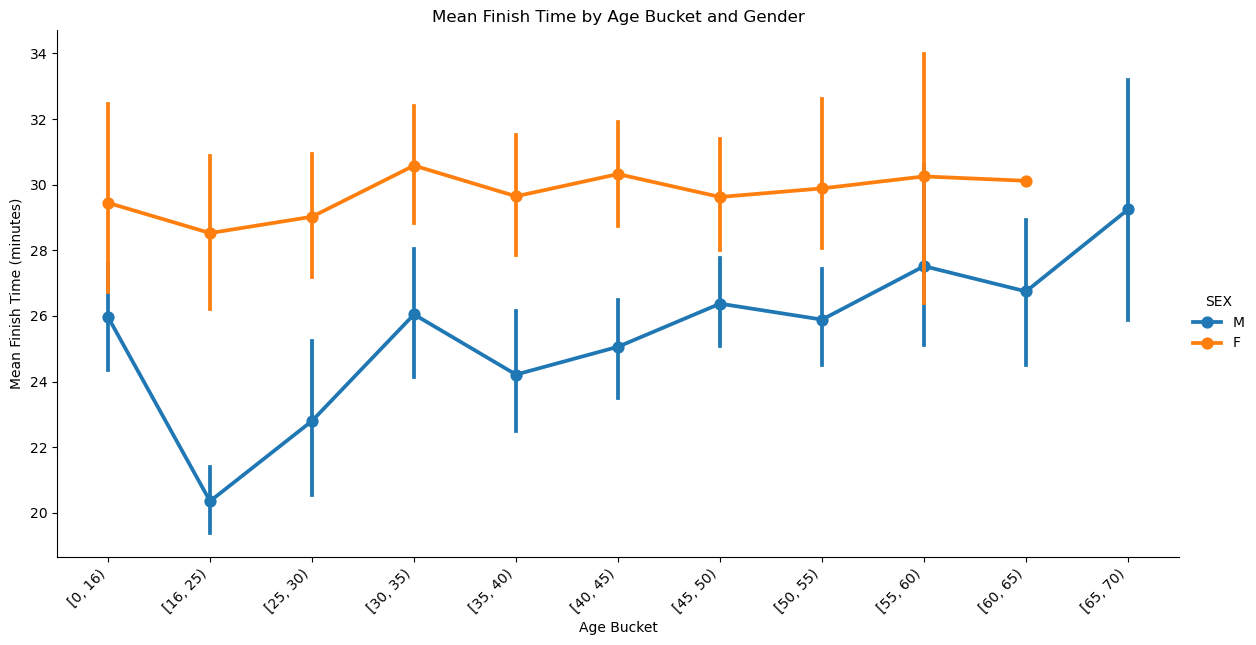

In [20]:
#Q8a. (3pts.)
sns.catplot(
    data=run_data,
    x="Disc_Age",
    y="Finish_Time",
    kind="point",
    hue="SEX",
    height=6,
    aspect=2
)
plt.title("Mean Finish Time by Age Bucket and Gender")
plt.xlabel("Age Bucket")
plt.ylabel("Mean Finish Time (minutes)")
plt.xticks(rotation=45, ha="right")
plt.show()

#Q8b. (2pts.) Your comment here.
# - Across all age groups, men consistently have faster average finish times compared to women.
# - Men show a significant improvement (lower finish times) in the younger age group [16, 25), with their times
#   increasing steadily as they age.
# - Women have relatively higher and more consistent finish times across age groups, with less dramatic changes
#   compared to men.


## Q9. Make a mosaic plot of Sex by Age 
### 3 pts.

a. Using the statsmodel package, create a mosaic plot that shows the proportion of men and women in each *age bucket*. (Make sure you have an up-to-date version of statsmodels to do this if you downloaded Anaconda prior to this semester).

b. Write a sentence that describes what you learn from the mosaic plot.  

<Figure size 1000x600 with 0 Axes>

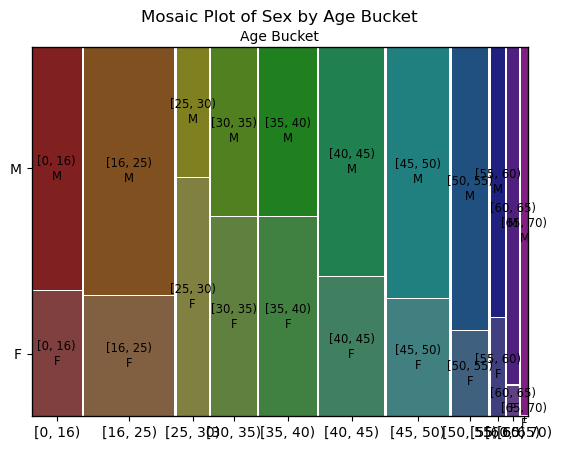

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

#9a. (2pts.)
contingency_table = run_data.groupby(["Disc_Age", "SEX"]).size()
data_dict = contingency_table.unstack().stack().to_dict()
plt.figure(figsize=(10, 6))
mosaic(contingency_table, title="Mosaic Plot of Sex by Age Bucket")
plt.xlabel("Age Bucket")
plt.ylabel("Proportion")
plt.show()
#9b. (1pt.) Your answer here.
# The mosaic plot shows that male runners dominate overall participation across most age groups; however, 
# female participation peaks in the age range [25, 30), indicating a higher proportion of women runners in 
# this specific age group compared to others.